In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [14]:
olivetti = fetch_olivetti_faces()

olivetti

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], shape=(400, 4096), dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ...

In [16]:
np.unique(olivetti.target).shape

(40,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(olivetti.data, olivetti.target, random_state=42, test_size=0.3)

In [28]:
print(f'X_train: {X_train.shape}; X_test: {X_test.shape}; y_train: {y_train.shape}; y_test: {y_test.shape}')

X_train: (280, 4096); X_test: (120, 4096); y_train: (280,); y_test: (120,)


In [29]:
mms = MinMaxScaler()
mms.fit_transform(X_train)
mms.fit_transform(X_test)

array([[0.12499999, 0.18857142, 0.3314286 , ..., 0.00595237, 0.09580838,
        0.02469135],
       [0.10714285, 0.03999999, 0.0057143 , ..., 0.19047618, 0.21556884,
        0.2037037 ],
       [0.5714286 , 0.69714284, 0.7028572 , ..., 0.39880952, 0.40718558,
        0.40123457],
       ...,
       [0.33928573, 0.26285714, 0.10857143, ..., 0.3035714 , 0.31736523,
        0.32716048],
       [0.4464286 , 0.52      , 0.5885714 , ..., 0.7321428 , 0.7784431 ,
        0.8024691 ],
       [0.1547619 , 0.10857143, 0.09714289, ..., 0.2142857 , 0.2275449 ,
        0.22222221]], shape=(120, 4096), dtype=float32)

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predict_train = knn.predict(X_train)
predict_proba_train = knn.predict_proba(X_train)

predict_test = knn.predict(X_test)
predict_proba_test = knn.predict_proba(X_test)

print(f'predict: train {accuracy_score(y_train, predict_train)}, test: {accuracy_score(y_test, predict_test)}')
print(f'predict proba: train {log_loss(y_train, predict_proba_train, labels=knn.classes_)}, test: {log_loss(y_test, predict_proba_test, labels=knn.classes_)}')

predict: train 0.9214285714285714, test: 0.7833333333333333
predict proba: train 0.3848022755477608, test: 2.0576748639836295


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

qui c'è un po di overfitting.

Proviamo a vedere se esistono strutture migliori

In [ ]:
for i in range (1, 12):
  print(f'n_neighbors: {i}')
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  predict_train = knn.predict(X_train)
  predict_proba_train = knn.predict_proba(X_train)

  predict_test = knn.predict(X_test)
  predict_proba_test = knn.predict_proba(X_test)

  print(f'predict: train {accuracy_score(y_train, predict_train)}, test: {accuracy_score(y_test, predict_test)}')
  print(f'predict proba: train {log_loss(y_train, predict_proba_train, labels=knn.classes_)}, test: {log_loss(y_test, predict_proba_test, labels=knn.classes_)}')
  print('--------------------------------------------------------------------------------------------')

n_neighbors: 1
predict: train 1.0, test: 0.8833333333333333
predict proba: train 2.220446049250313e-16, test: 4.205092895397001
--------------------------------------------------------------------------------------------
n_neighbors: 2


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.9714285714285714, test: 0.7833333333333333
predict proba: train 0.0519860385419961, test: 2.8476796668004423
--------------------------------------------------------------------------------------------
n_neighbors: 3


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.9642857142857143, test: 0.775
predict proba: train 0.1540074943910863, test: 2.414480080053596
--------------------------------------------------------------------------------------------
n_neighbors: 4


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.9392857142857143, test: 0.7833333333333333
predict proba: train 0.2596882099710804, test: 2.239534207947556
--------------------------------------------------------------------------------------------
n_neighbors: 5


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.9214285714285714, test: 0.7833333333333333
predict proba: train 0.3848022755477608, test: 2.0576748639836295
--------------------------------------------------------------------------------------------
n_neighbors: 6


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.8821428571428571, test: 0.7666666666666667
predict proba: train 0.4832551322847574, test: 1.8799208795916276
--------------------------------------------------------------------------------------------
n_neighbors: 7


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.8714285714285714, test: 0.7
predict proba: train 0.578369986209203, test: 1.9736390566551927
--------------------------------------------------------------------------------------------
n_neighbors: 8


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.85, test: 0.7
predict proba: train 0.6783735538389558, test: 2.0689951402840023
--------------------------------------------------------------------------------------------
n_neighbors: 9


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.8107142857142857, test: 0.6333333333333333
predict proba: train 0.77296675780741, test: 2.1603791064644775
--------------------------------------------------------------------------------------------
n_neighbors: 10


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.8107142857142857, test: 0.6166666666666667
predict proba: train 0.8583155131465469, test: 1.9538586054769487
--------------------------------------------------------------------------------------------
n_neighbors: 11


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 0.7928571428571428, test: 0.6
predict proba: train 0.9397961830643242, test: 2.030200647762204
--------------------------------------------------------------------------------------------


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

in questo modo tende ad overfittare.
provo a puntare sulla distanza dei punti

In [40]:
for i in range (1, 12):
  print(f'n_neighbors: {i}')
  knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
  knn.fit(X_train, y_train)

  predict_train = knn.predict(X_train)
  predict_proba_train = knn.predict_proba(X_train)

  predict_test = knn.predict(X_test)
  predict_proba_test = knn.predict_proba(X_test)

  print(f'predict: train {accuracy_score(y_train, predict_train)}, test: {accuracy_score(y_test, predict_test)}')
  print(f'predict proba: train {log_loss(y_train, predict_proba_train, labels=knn.classes_)}, test: {log_loss(y_test, predict_proba_test, labels=knn.classes_)}')
  print('--------------------------------------------------------------------------------------------')

n_neighbors: 1
predict: train 1.0, test: 0.9
predict proba: train 2.220446049250313e-16, test: 3.6043653389117147
--------------------------------------------------------------------------------------------
n_neighbors: 2


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.9
predict proba: train 2.220446049250313e-16, test: 1.3415124729855725
--------------------------------------------------------------------------------------------
n_neighbors: 3


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.9
predict proba: train 2.220446049250313e-16, test: 1.451691565457989
--------------------------------------------------------------------------------------------
n_neighbors: 4


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.8583333333333333
predict proba: train 2.220446049250313e-16, test: 1.5656564890432383
--------------------------------------------------------------------------------------------
n_neighbors: 5


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.8083333333333333
predict proba: train 2.220446049250313e-16, test: 1.3903066457712099
--------------------------------------------------------------------------------------------
n_neighbors: 6


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.8
predict proba: train 2.220446049250313e-16, test: 1.4729245060401135
--------------------------------------------------------------------------------------------
n_neighbors: 7


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.7916666666666666
predict proba: train 2.220446049250313e-16, test: 1.5595162725458502
--------------------------------------------------------------------------------------------
n_neighbors: 8


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.7666666666666667
predict proba: train 2.220446049250313e-16, test: 1.630184737000971
--------------------------------------------------------------------------------------------
n_neighbors: 9


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.75
predict proba: train 2.220446049250313e-16, test: 1.7050053635108537
--------------------------------------------------------------------------------------------
n_neighbors: 10


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.7166666666666667
predict proba: train 2.220446049250313e-16, test: 1.7682661930286736
--------------------------------------------------------------------------------------------
n_neighbors: 11


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

predict: train 1.0, test: 0.7166666666666667
predict proba: train 2.220446049250313e-16, test: 1.5448579257669968
--------------------------------------------------------------------------------------------


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

probabilmente il miglior compromesso in questo caso è:
3 neighbors, weight distance e metric manhattan

In [41]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

predict_train = knn.predict(X_train)
predict_proba_train = knn.predict_proba(X_train)

predict_test = knn.predict(X_test)
predict_proba_test = knn.predict_proba(X_test)

print(f'predict: train {accuracy_score(y_train, predict_train)}, test: {accuracy_score(y_test, predict_test)}')
print(f'predict proba: train {log_loss(y_train, predict_proba_train, labels=knn.classes_)}, test: {log_loss(y_test, predict_proba_test, labels=knn.classes_)}')
print('--------------------------------------------------------------------------------------------')

predict: train 1.0, test: 0.9
predict proba: train 2.220446049250313e-16, test: 1.451691565457989
--------------------------------------------------------------------------------------------


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.

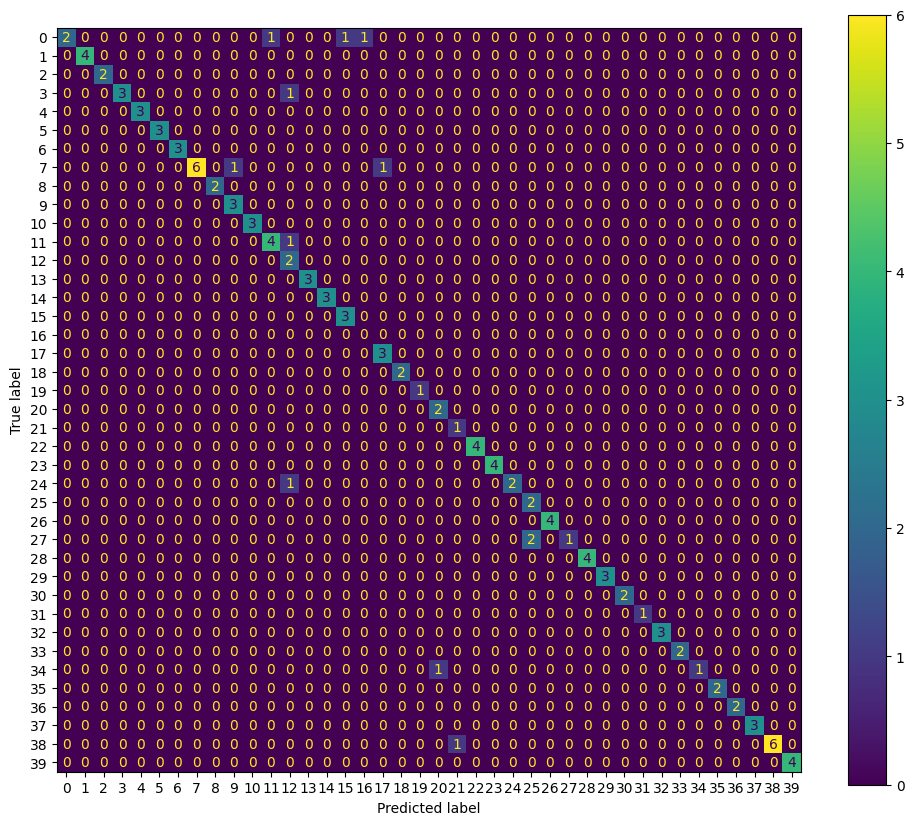

In [44]:
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(ax=ax, values_format='d')
plt.show()